#Credit Card default prediction-Project



##Project Description
This project focuses on predicting instances of customers defaulting on their credit card payments.With a risk management perspective in mind, accurately predicting whether a customer is likely to default on their bills in future terms holds significant importance.

We will assess and identify customers who are likely to default on their credit card payments. Subsequently, we will categorize customers into two groups: those who are likely to default and those who are not.

###About the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_excel('/content/drive/MyDrive/credit_card.xls')

We have the credit card dataset from Taiwan : https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
####Description of the dependent and independent features



* ***ID***: ID of the client
* ***LIMIT_BAL***:Amount of credit given in NT dollars


* ***SEX***:
1. For male :1
2. For female :2


* ***EDUCATION***:
1. For graduate school :1
2. For university :2
3. For high school :3
4. Others :4

* ***MARRIAGE***: Marital status
1. For married :1
2. For single :2
3. For others :3

* ***AGE***: Age in years
* Pay_0: Payment status in september,2005
* PAY_2: Repayment status in August, 2005
* PAY_3: Repayment status in July, 2005
* PAY_4: Repayment status in June, 2005
* PAY_5: Repayment status in May, 2005
* PAY_6: Repayment status in April, 2005

The measurement scale for the repayment status is as follows,
1. Pay duly :-1 or 0
2. Payment delay for one month :1  
3. Payment delay for two months :2

similarly
4. Payment delay for eight months :8
5. Payment delay for nine months and above :9

* BILL_AMT1: Amount of bill statement in September, 2005
* BILL_AMT2: Amount of bill statement in August, 2005
* BILL_AMT3: Amount of bill statement in July, 2005
* BILL_AMT4: Amount of bill statement in June, 2005
* BILL_AMT5: Amount of bill statement in May, 2005
* BILL_AMT6: Amount of bill statement in April, 2005
* PAY_AMT1: Amount of previous payment in September, 2005
* PAY_AMT2: Amount of previous payment in August, 2005
* PAY_AMT3: Amount of previous payment in July, 2005
* PAY_AMT4: Amount of previous payment in June, 2005
* PAY_AMT5: Amount of previous payment in May, 2005
* PAY_AMT6: Amount of previous payment in April, 2005

(All the amounts in NT dollar)
* Default payment next month:
1. If Default payment is yes :1
2. If Default payment is No :0





In [ ]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


##Preprocessing

####Setting the column names properly

By looking at the data we can see that the column name for each features is shown as a seperate data point,in the 0 row index.

In [ ]:
column_names=data.iloc[0]#First row of the data frame is column names.
data = data[1:]  # Remove the first row from the DataFrame and updating the data frame
data.columns = column_names  # Set the column names

In [ ]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


###Checking for Null values

In [ ]:
data.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no Null values in the given data set.

###Value counts in each features

In [ ]:
column_names=data.columns
column_names

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [ ]:
for names in column_names:
  print(f"For {names} the value counts are \n",data[names].value_counts())

For ID the value counts are 
 1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64
For LIMIT_BAL the value counts are 
 50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64
For SEX the value counts are 
 2    18112
1    11888
Name: SEX, dtype: int64
For EDUCATION the value counts are 
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
For MARRIAGE the value counts are 
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
For AGE the value counts are 
 29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     8



*   Education has 345 undefined values 0,5 and 6,which is very less compared total number of data 30000

We will remove rows having these values.
*   Marriage has 54 undefined value of 0, which is very less compared total number of data 30000

We will remove rows having these values.

* Repayment status has undefined values -2

There is no explanation for this values -2,hence we cannot assume anything,and just have to remove the rows that contain these values.

We will replace -1 with 0 as both the values have the same meaning.


####Education
Removing the 0,5 and 6 labels

In [ ]:

data = data[~((data['EDUCATION'] == 0) | (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6))]

In [ ]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      123
Name: EDUCATION, dtype: int64

####Marriage
Removing the rows with the undefined value of 0

In [ ]:
data=data[data['MARRIAGE']!=0]


In [ ]:
data['MARRIAGE'].value_counts()

2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

####Repayment status
Removing all the rows having -2 for columns between PAY_0(index:6) to PAY_6(index:13)

In [ ]:
condition=(data.loc[:,'PAY_0':'PAY_6'] == -2).any(axis=1)
data = data[~condition]

Replacing 0's with -1

In [ ]:
data.loc[:, 'PAY_0':'PAY_6'] = data.loc[:, 'PAY_0':'PAY_6'].replace(0,-1)

<ipython-input-17-b19a01fc9c23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'PAY_0':'PAY_6'] = data.loc[:, 'PAY_0':'PAY_6'].replace(0,-1)


In [ ]:
for column in data.loc[:, 'PAY_0':'PAY_6'].columns:
    value_counts = data[column].value_counts()
    print(f"\nValue counts for {column}:\n{value_counts}")


Value counts for PAY_0:
-1    18050
 2     2493
 1     2169
 3      304
 4       74
 5       21
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

Value counts for PAY_2:
-1    19026
 2     3640
 3      317
 4       93
 5       25
 7       20
 1       16
 6       12
 8        1
Name: PAY_2, dtype: int64

Value counts for PAY_3:
-1    19211
 2     3555
 3      230
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

Value counts for PAY_4:
-1    19808
 2     2992
 3      179
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

Value counts for PAY_5:
-1    20294
 2     2518
 3      175
 4       83
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

Value counts for PAY_6:
-1    20159
 2     2686
 3      176
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


####ID
ID is not usefull when we fit the model,as it does not effect the output in anyway.Hence we need to remove the ID column.

In [ ]:
data=data.drop(columns=['ID'])

####Checking the value counts of output class

Text(0.5, 1.0, 'Proportion of Default Payment is YES or NO')

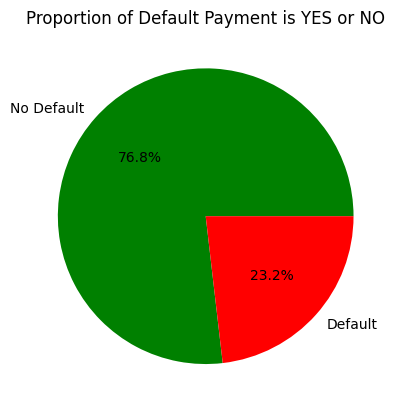

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data['default payment next month'].value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['No Default', 'Default'])
plt.title('Proportion of Default Payment is YES or NO')

Its clearly an imbalanced data set,hence we may have to balance the data set using techniques like SMOTE

##EDA

### Payment Status (PAY_X)

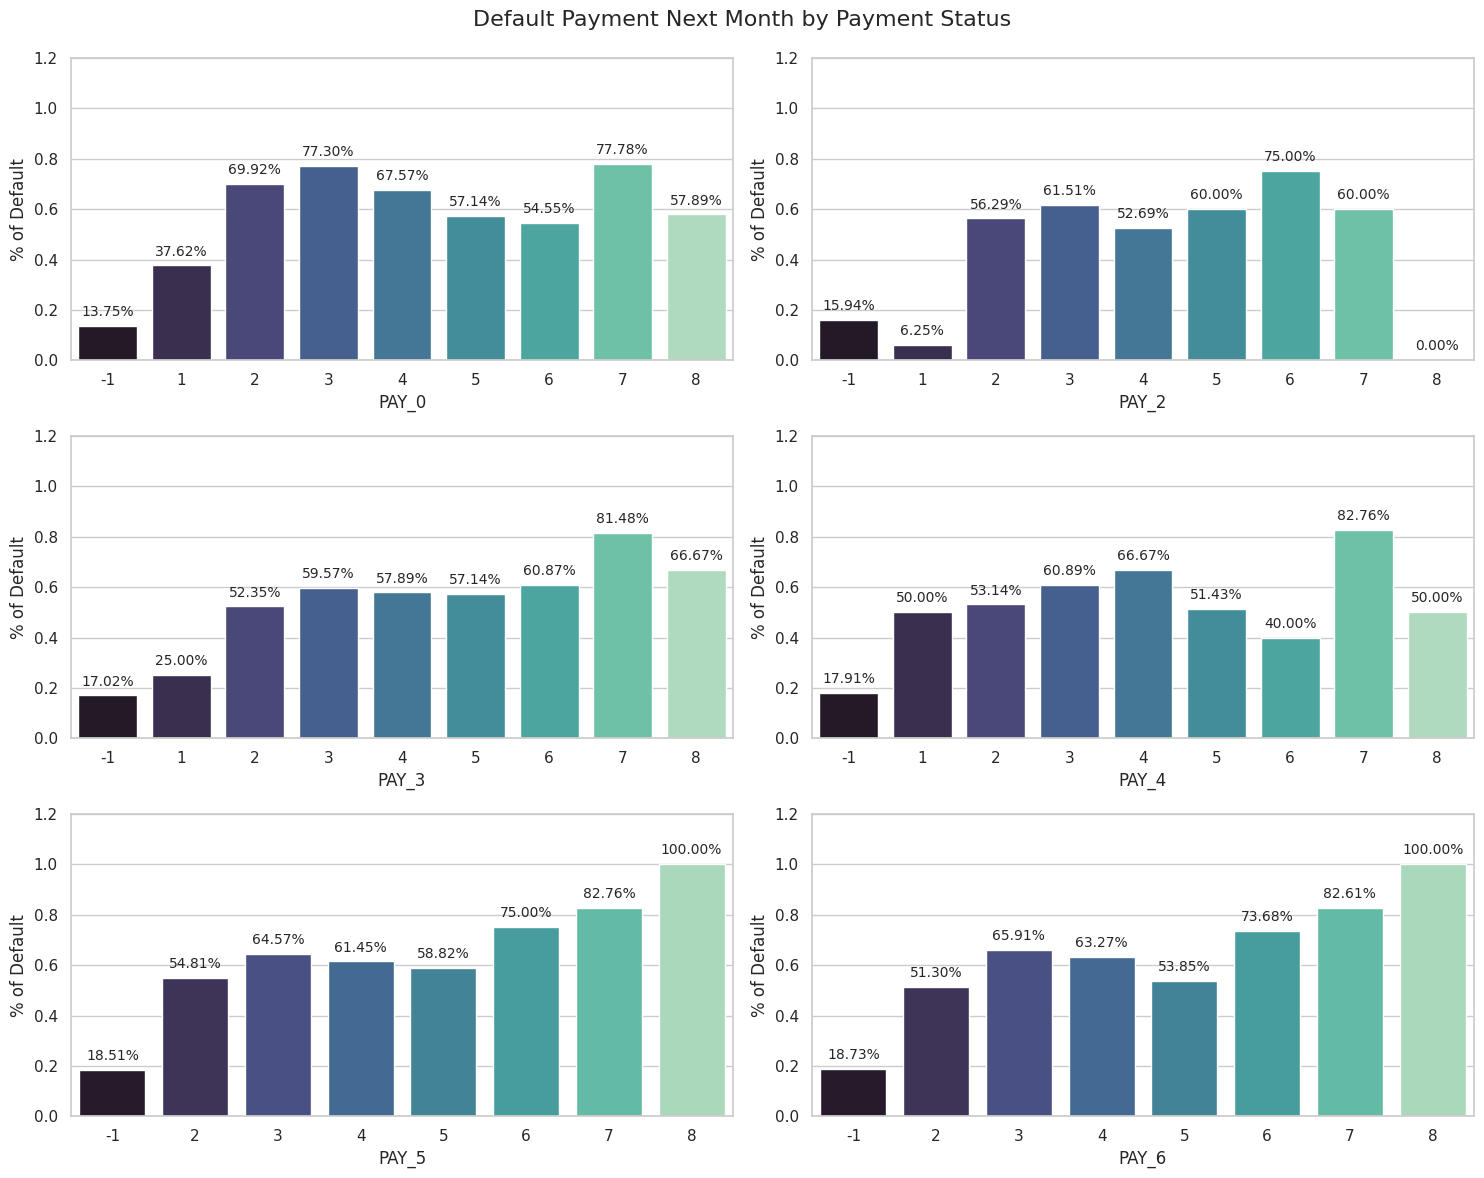

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pay_x_pts = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")

for i, col in enumerate(pay_x_pts):
    plt.subplot(3, 2, i + 1)
    ax = sns.barplot(x=col, y="default payment next month", data=data, palette='mako', errwidth=0)

    plt.ylabel("% of Default", fontsize=12)
    plt.ylim(0, 1.2)
    plt.xlabel(f'{col}', fontsize=12)

    #Annotate the bars with percentages
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

#Adjust layout and showing the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Default Payment Next Month by Payment Status', fontsize=16)
plt.show()



*  Credit card holders who consistently defer their payments for over three months demonstrate a markedly elevated likelihood of encountering defaults.

###Amount of Bill Statement (BILL_AMT)

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
    for i, var_name in enumerate(variables):
        row = i // n_cols
        col = i % n_cols
        sns.histplot(data=df, x=var_name, bins=n_bins, ax=axes[row, col])
        axes[row, col].set_title(var_name)
    fig.tight_layout()
    plt.show()

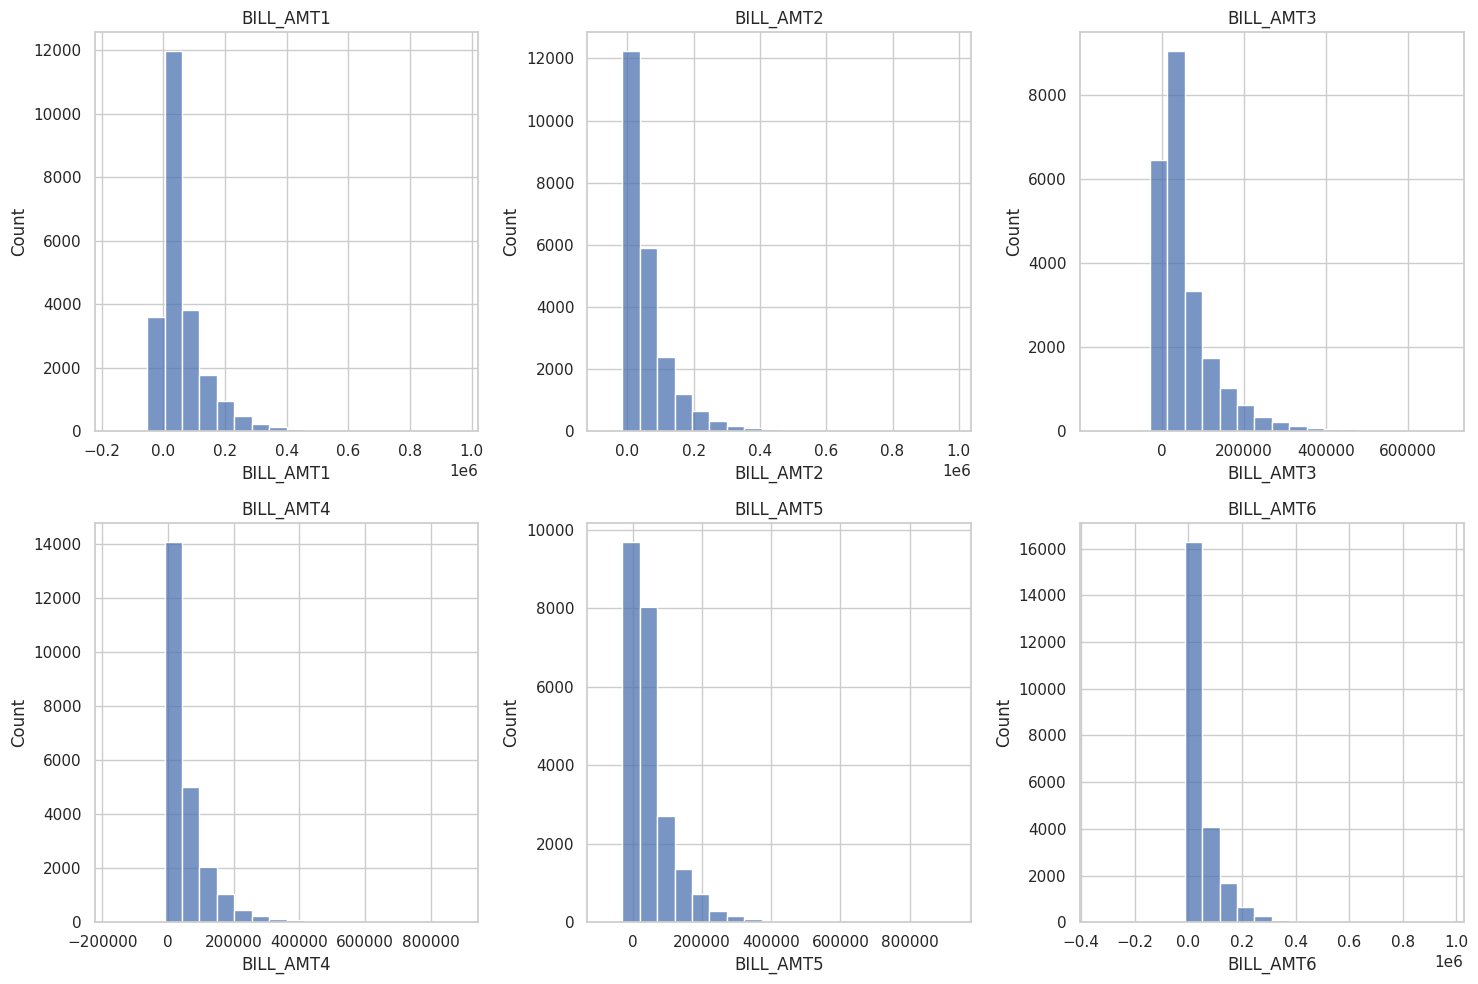

In [ ]:
bill_amt_fts = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
bills = data[bill_amt_fts]
draw_histograms(bills, bills.columns, 2, 3, 20)

###PAY_AMT

In [ ]:
data['PAY_AMT1_bin'] = data['PAY_AMT1'].copy()
data['PAY_AMT2_bin'] = data['PAY_AMT2'].copy()
data['PAY_AMT3_bin'] = data['PAY_AMT3'].copy()
data['PAY_AMT4_bin'] = data['PAY_AMT4'].copy()
data['PAY_AMT5_bin'] = data['PAY_AMT5'].copy()
data['PAY_AMT6_bin'] = data['PAY_AMT6'].copy()

In [ ]:
pay_amt_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amt_bins):
    data[col] = pd.cut(data[pay_amt_bins[i]],[-1, 0, 25000, 50000, 100000, 2000000])

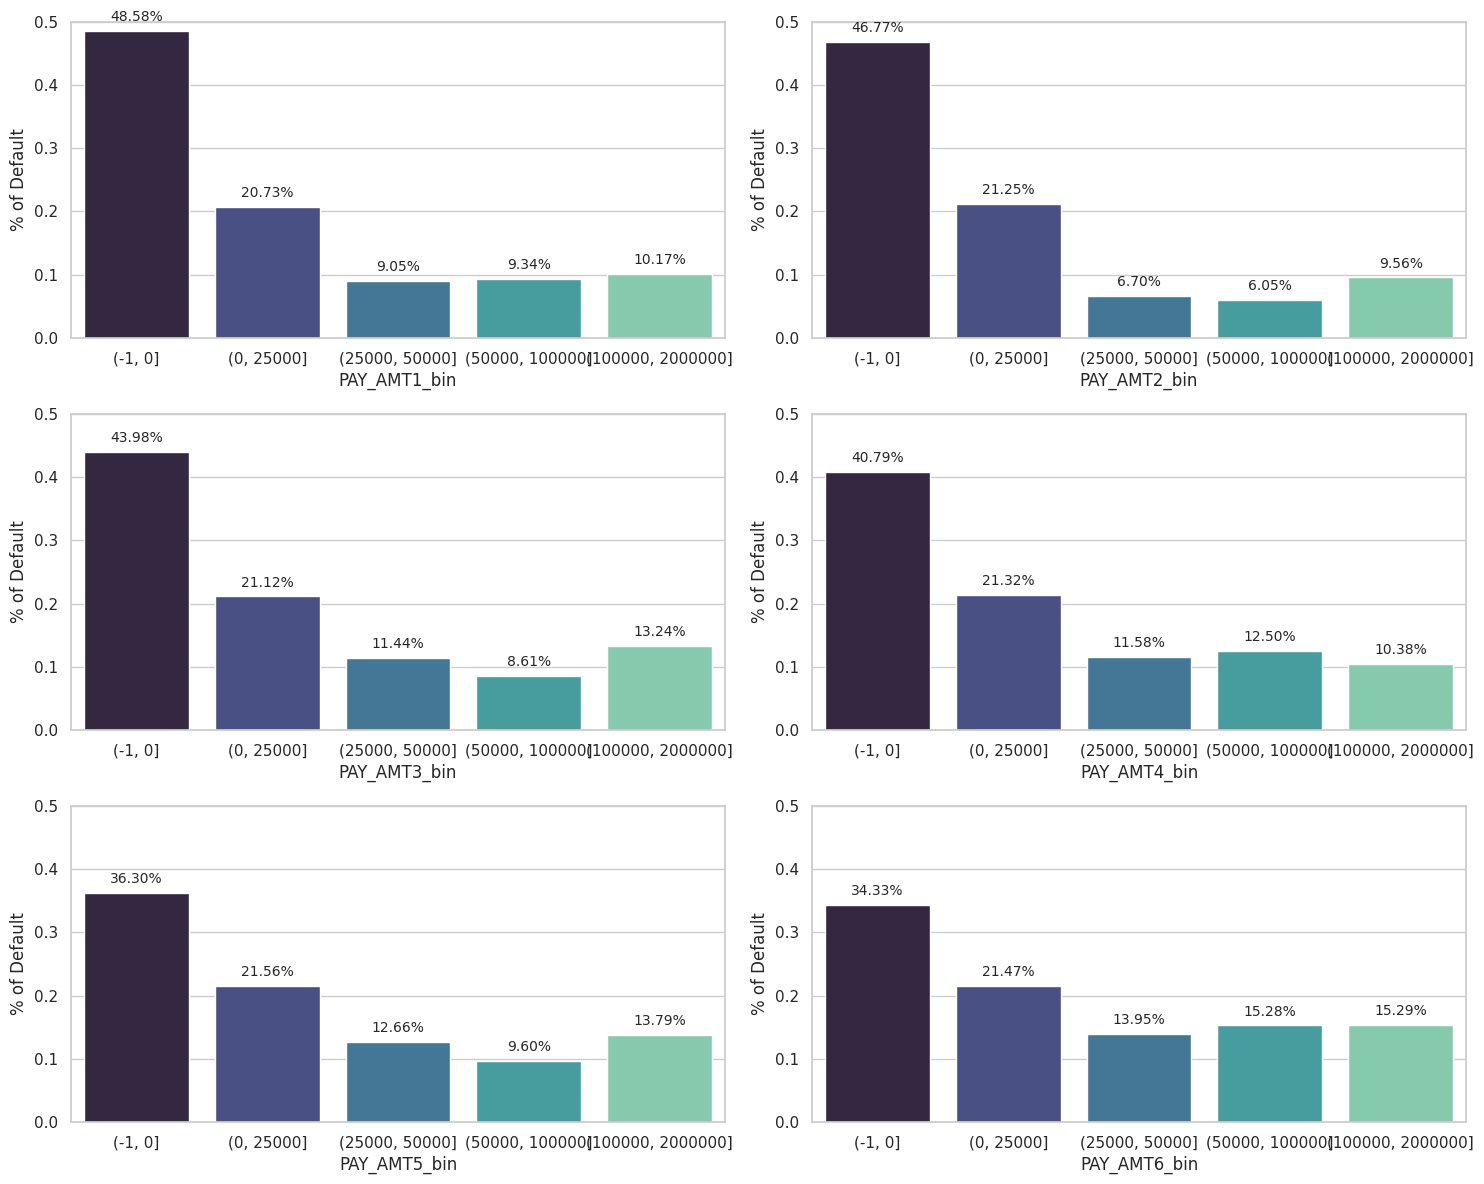

In [ ]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(pay_amt_bins):
    plt.subplot(3, 2, i + 1)
    ax = sns.barplot(x=col, y="default payment next month", data=data, palette='mako', errwidth=0)

    plt.ylabel("% of Default", fontsize=12)
    plt.ylim(0, 0.5)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()


-> Individuals who made no payments in the previous months exhibit a higher default rate, whereas those who paid over 25k NT dollars have lower default rates.

###Categorical Columns (SEX, EDUCATION, MARRIAGE)

### Column EDUCATION

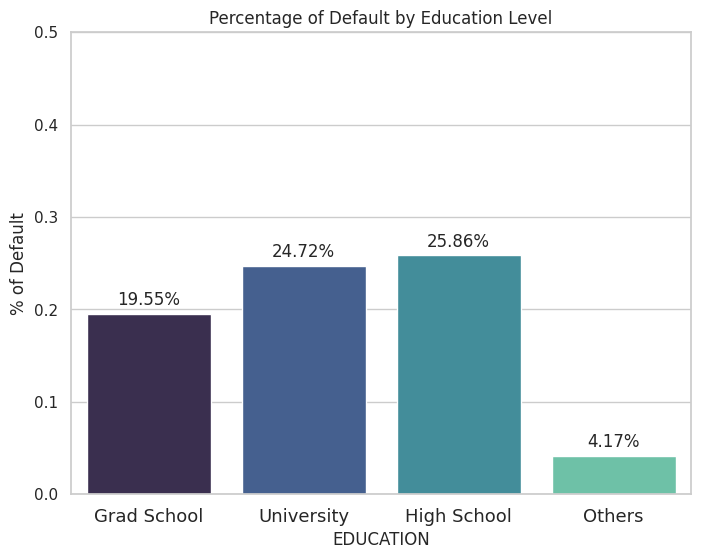

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for EDUCATION
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="EDUCATION", y="default payment next month", data=data, palette='mako', errwidth=0)
ax.set_ylabel("% of Default", fontsize=12)
ax.set_ylim(0, 0.5)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grad School', 'University', 'High School', 'Others'], fontsize=13)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Percentage of Default by Education Level')
plt.show()


-> The probability of default decreases with higher levels of education.

### COLUMN MARRIAGE

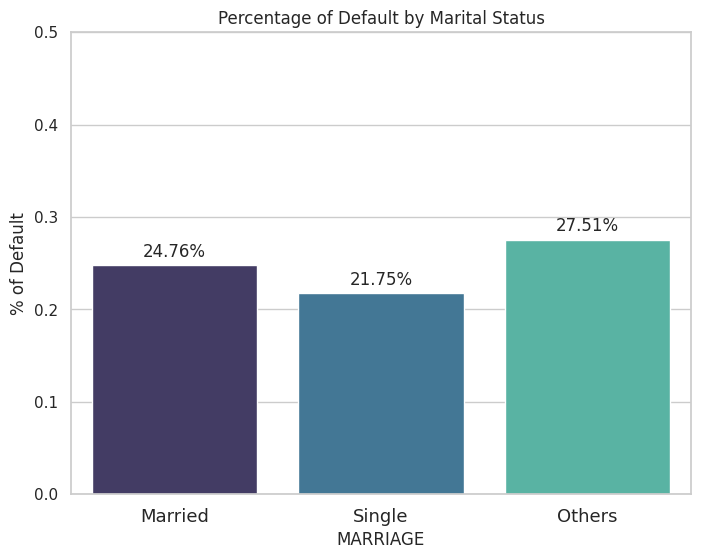

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for MARRIAGE
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="MARRIAGE", y="default payment next month", data=data, palette='mako', errwidth=0)
ax.set_ylabel("% of Default", fontsize=12)
ax.set_ylim(0, 0.5)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Married', 'Single', 'Others'], fontsize=13)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Percentage of Default by Marital Status')
plt.show()


###COLUMN SEX

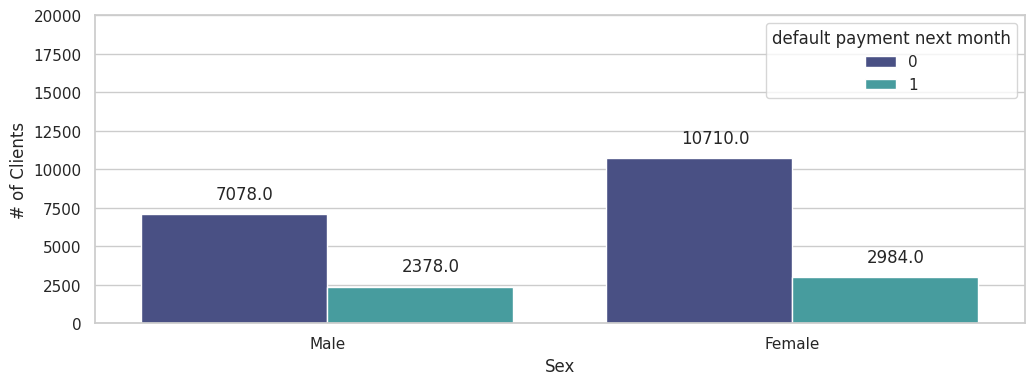

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = data, x = 'SEX', hue="default payment next month", palette = 'mako')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

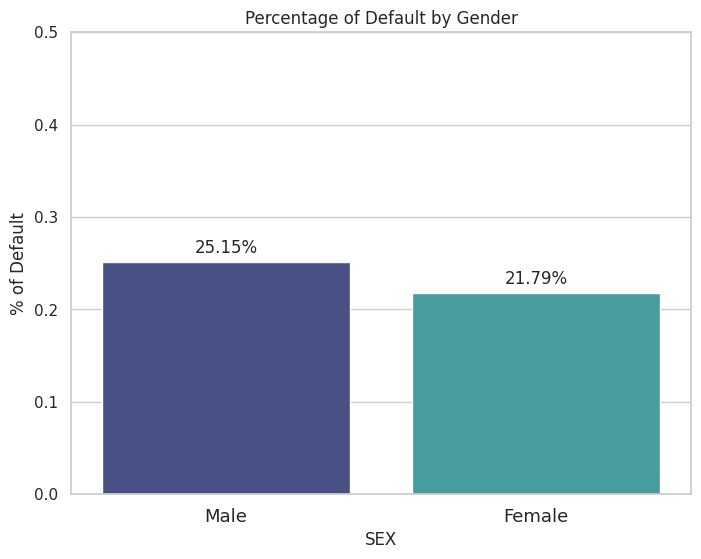

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for SEX
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="SEX", y="default payment next month", data=data, palette='mako', errwidth=0)
ax.set_ylabel("% of Default", fontsize=12)
ax.set_ylim(0, 0.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontsize=13)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Percentage of Default by Gender')
plt.show()




-> Individuals with marital statuses categorized as married or other have an approximate default probability of 24.76%, whereas single individuals have a lower likelihood at 21.75%.

-> Despite a smaller representation of males in the dataset compared to females, males demonstrate a higher probability of being defaulters.

### AGE COLUMN

<Axes: xlabel='AGE', ylabel='Count'>

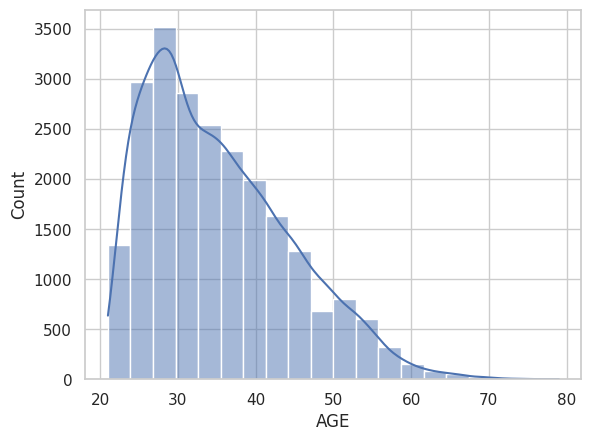

In [ ]:
sns.histplot(data['AGE'],bins=20,kde=True)

The majority of individuals in the dataset fall within the age range of 25 to 35

In [ ]:
data['AgeBin'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data['AgeBin'].value_counts())

(25, 30]    5645
(40, 50]    4539
(30, 35]    4312
(35, 40]    3642
(20, 25]    3270
(50, 60]    1534
(60, 80]     208
Name: AgeBin, dtype: int64


In [ ]:
data['AgeBin'] = data['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

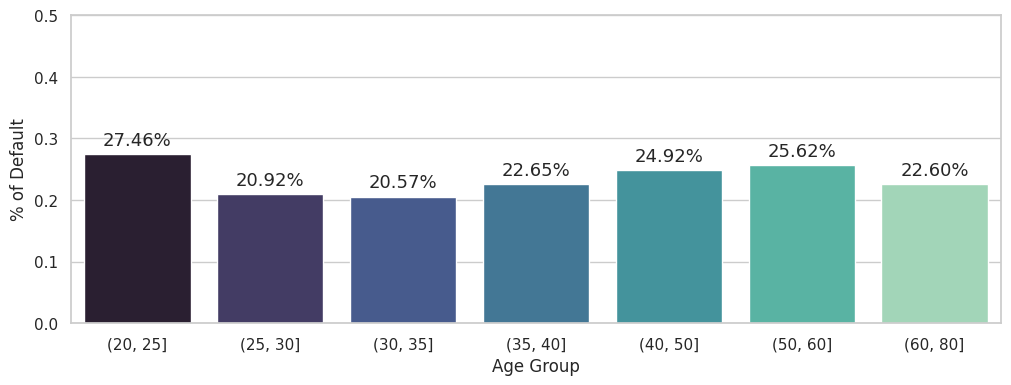

In [ ]:
plt.figure(figsize=(12, 4))

ax = sns.barplot(x="AgeBin", y="default payment next month", data=data, palette='mako', errwidth=0, order=AgeBin_order)

plt.xlabel("Age Group", fontsize=12)
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=13)

plt.show()


-> Individuals in the age range of 20 to 25, as well as those aged between 50 and 60, demonstrate a higher susceptibility to default on their credit card payments.

### LIMIT BALANCE COLUMN (LIMIT_BAL)

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

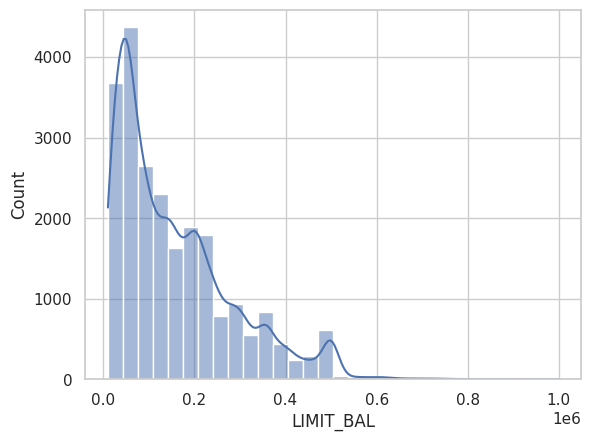

In [ ]:
sns.histplot(data['LIMIT_BAL'],bins=30,kde=True)

In [ ]:
data['LimitBin'] = pd.cut(data['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(data['LimitBin'].value_counts())

(5000, 50000]        6599
(50000, 100000]      4096
(200000, 300000]     3521
(100000, 150000]     3068
(150000, 200000]     2760
(300000, 400000]     1816
(400000, 500000]     1135
(500000, 1100000]     155
Name: LimitBin, dtype: int64


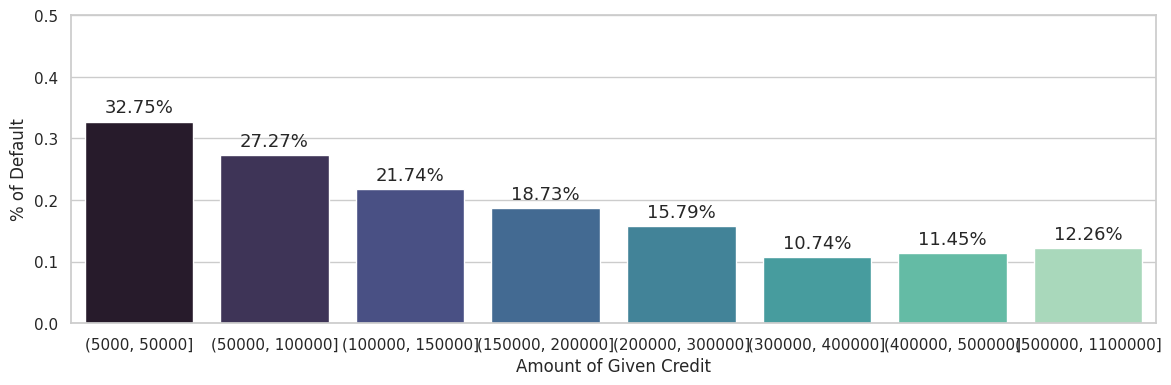

In [ ]:
plt.figure(figsize=(14,4))
data['LimitBin'] = data['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.barplot(x="LimitBin", y="default payment next month", data=data, palette='mako', errwidth=0, order=LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize=12)
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=13)

plt.show()



-> A majority, nearly 60%, of defaulting customers possess credit limits below 100k NT dollars.


##Feature scaling

In [ ]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,default payment next month,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin,AgeBin,LimitBin
2,120000,2,2,2,26,-1,2,-1,-1,-1,...,2000,1,"(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(25, 30]","(100000, 150000]"
3,90000,2,2,2,34,-1,-1,-1,-1,-1,...,5000,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(30, 35]","(50000, 100000]"
4,50000,2,2,1,37,-1,-1,-1,-1,-1,...,1000,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(35, 40]","(5000, 50000]"
5,50000,1,2,1,57,-1,-1,-1,-1,-1,...,679,0,"(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(50, 60]","(5000, 50000]"
6,50000,1,1,2,37,-1,-1,-1,-1,-1,...,800,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(35, 40]","(5000, 50000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,-1,-1,-1,-1,-1,...,1000,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(35, 40]","(200000, 300000]"
29997,150000,1,3,2,43,-1,-1,-1,-1,-1,...,0,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(40, 50]","(100000, 150000]"
29998,30000,1,2,2,37,4,3,2,-1,-1,...,3100,1,"(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(35, 40]","(5000, 50000]"
29999,80000,1,3,1,41,1,-1,-1,-1,-1,...,1804,1,"(50000, 100000]","(0, 25000]","(0, 25000]","(0, 25000]","(50000, 100000]","(0, 25000]","(40, 50]","(50000, 100000]"


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data.loc[:, 'LIMIT_BAL':'PAY_AMT6'] = scaler.fit_transform(data.loc[:, 'LIMIT_BAL':'PAY_AMT6'])

<ipython-input-39-822050a77857>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'LIMIT_BAL':'PAY_AMT6'] = scaler.fit_transform(data.loc[:, 'LIMIT_BAL':'PAY_AMT6'])


In [ ]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,default payment next month,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin,AgeBin,LimitBin
2,-0.284267,0.830976,0.211385,0.839789,-0.994901,-0.501419,1.961352,-0.441186,-0.396274,-0.361453,...,-0.192784,1,"(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(25, 30]","(100000, 150000]"
3,-0.519414,0.830976,0.211385,0.839789,-0.133865,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,...,-0.019373,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(30, 35]","(50000, 100000]"
4,-0.832944,0.830976,0.211385,-1.087937,0.189023,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,...,-0.250588,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(35, 40]","(5000, 50000]"
5,-0.832944,-1.203404,0.211385,-1.087937,2.341612,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,...,-0.269143,0,"(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(50, 60]","(5000, 50000]"
6,-0.832944,-1.203404,-1.217390,0.839789,0.189023,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,...,-0.262149,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(35, 40]","(5000, 50000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.499557,-1.203404,1.640159,-1.087937,0.404282,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,...,-0.250588,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(35, 40]","(200000, 300000]"
29997,-0.049120,-1.203404,1.640159,0.839789,0.834800,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,...,-0.308392,0,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(40, 50]","(100000, 150000]"
29998,-0.989709,-1.203404,0.211385,0.839789,0.189023,3.689447,2.766954,2.009457,-0.396274,-0.361453,...,-0.129200,1,"(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(35, 40]","(5000, 50000]"
29999,-0.597797,-1.203404,1.640159,-1.087937,0.619541,1.174927,-0.455452,-0.441186,-0.396274,-0.361453,...,-0.204114,1,"(50000, 100000]","(0, 25000]","(0, 25000]","(0, 25000]","(50000, 100000]","(0, 25000]","(40, 50]","(50000, 100000]"


###Label Encoding

In [ ]:
data['default payment next month'].dtype

dtype('O')



* Data type is dtype('O') for the target: This will have various types like integer,strings.
* To perform smote we need the dtype('int64') ,without loosing the actual value of the data.Hence need to use Label Encoding.



In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['default payment next month'] = label_encoder.fit_transform(data['default payment next month'])

In [ ]:
data['default payment next month'].dtype

dtype('int64')

In [ ]:
data['default payment next month'].value_counts()

0    17788
1     5362
Name: default payment next month, dtype: int64





##Feature selection

<ipython-input-45-5ddb1aaf4beb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


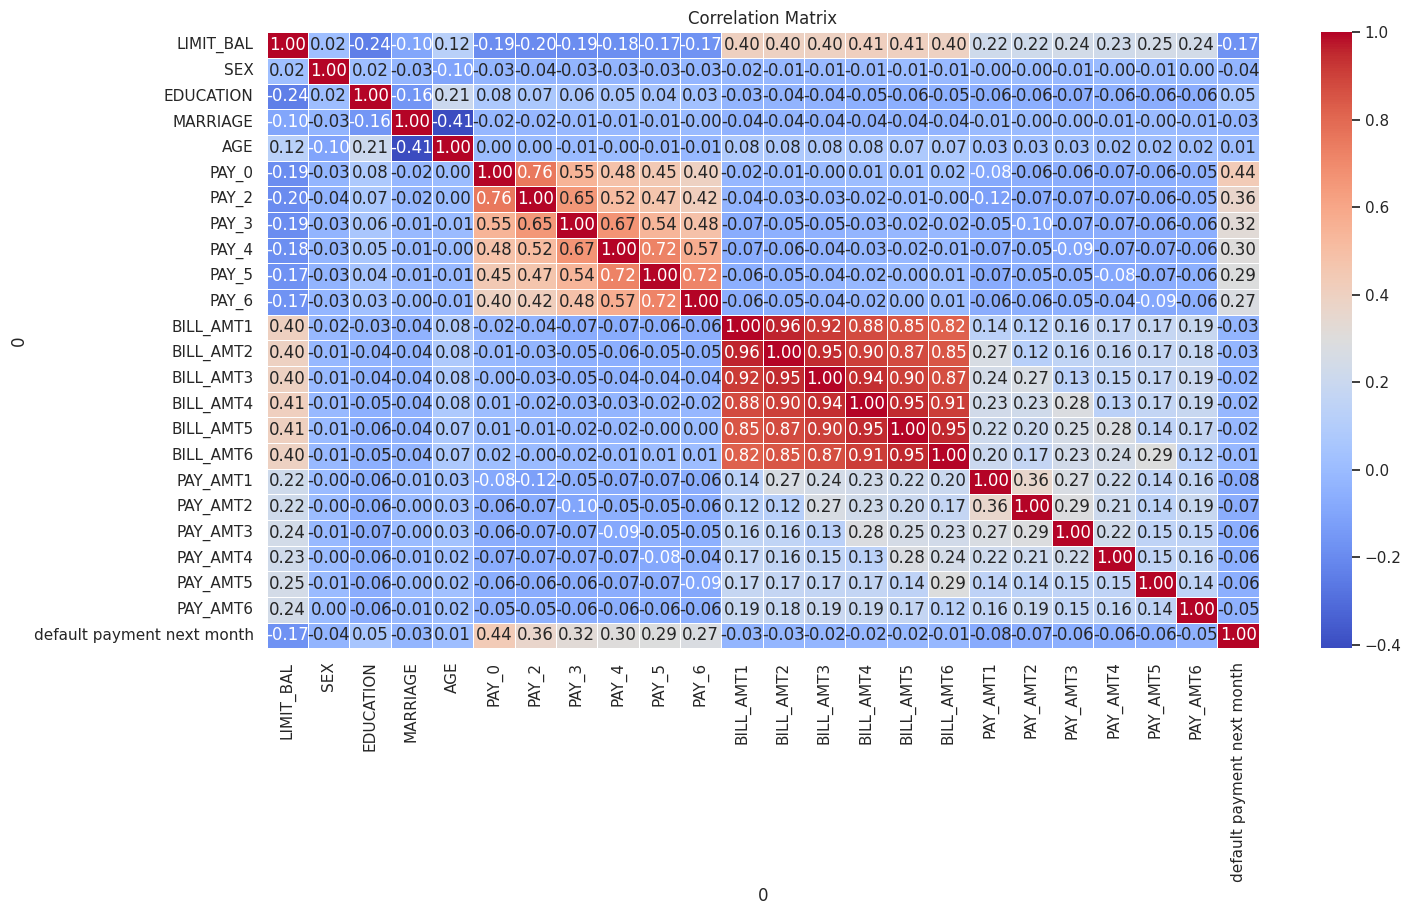


Selected Features based on correlation threshold 0.1:
['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']


In [ ]:
import seaborn as sns
correlation_matrix = data.corr()
# Plot the correlation matrix using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
correlation_threshold = 0.1
selected_features = correlation_matrix['default payment next month'][abs(correlation_matrix['default payment next month']) > correlation_threshold].index.tolist()

print(f"\nSelected Features based on correlation threshold {correlation_threshold}:\n{selected_features}")

Data considering only the selected features.

In [ ]:
feature_select=data[selected_features]

In [ ]:
feature_select

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
2,-0.284267,-0.501419,1.961352,-0.441186,-0.396274,-0.361453,2.320325,1
3,-0.519414,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,-0.372362,0
4,-0.832944,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,-0.372362,0
5,-0.832944,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,-0.372362,0
6,-0.832944,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,-0.372362,0
...,...,...,...,...,...,...,...,...
29996,0.499557,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,-0.372362,0
29997,-0.049120,-0.501419,-0.455452,-0.441186,-0.396274,-0.361453,-0.372362,0
29998,-0.989709,3.689447,2.766954,2.009457,-0.396274,-0.361453,-0.372362,1
29999,-0.597797,1.174927,-0.455452,-0.441186,-0.396274,-0.361453,-0.372362,1


#Using all the features
Here we will utilize all the features available in the dataset to train various classification models.

##Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,0:23]
y=data['default payment next month']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

##Balancing of the data using (Synthetic Minority Over-sampling Technique)


In [ ]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=42)
x_smote,y_smote =sm.fit_resample(X_train,y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 16205
Resampled dataset shape 24882


Text(0.5, 1.0, 'Proportion of Default Payment is YES or NO')

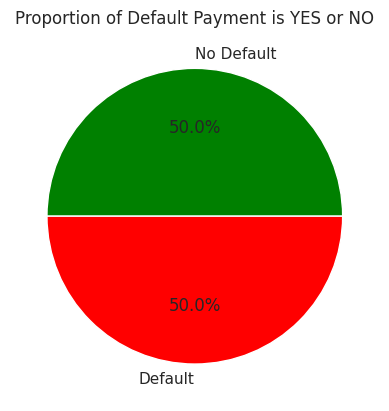

In [ ]:
import matplotlib.pyplot as plt
plt.pie(y_smote.value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['No Default', 'Default'])
plt.title('Proportion of Default Payment is YES or NO')

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve,auc
lor=LogisticRegression()
lor.fit(x_smote,y_smote)

LogisticRegression()

In [ ]:
y_pred_lor_train=lor.predict(X_train)
y_pred_lor_test=lor.predict(X_test)

In [ ]:
#Roc-AUC score for test data
roc_lor=roc_auc_score(y_test,y_pred_lor_test)

In [ ]:
roc_lor

0.7163855347518042

##RandomForest

#### RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#Number of trees in random forest
n_estimators = [10,20,30,40]

#Number of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of levels in tree
max_depth = [5,10,15,20,None]

#Number of samples
max_samples = [0.5,0.75,1.0]

#Bootstrap samples
bootstrap = [True,False]

#Minimum number of samples required to split a node
min_samples_split = [2, 5]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [10, 20, 30, 40], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [5, 10, 15, 20, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [ ]:

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1,refit=True)

In [ ]:
rf_grid.fit(x_smote,y_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/py

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20, 30, 40]},
                   verbose=2)

In [ ]:
rf_grid.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'max_features': 0.6,
 'max_depth': None,
 'bootstrap': True}

In [ ]:
rf_grid.best_score_

0.830484448721353

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_features=0.6, max_samples=1.0, min_samples_leaf=2,
                       n_estimators=10)

In [ ]:
y_pred_rf_test=rf_grid.predict(X_test)
y_pred_rf_train=rf_grid.predict(X_train)

In [ ]:
roc_rf=roc_auc_score(y_test, y_pred_rf_test)
roc_rf

0.6779898685775398

##Adaboosting

In [ ]:
from sklearn.utils import class_weight
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score

adaboost_classifier = AdaBoostClassifier()

#Paramgrid
param_dist = {
    'n_estimators': randint(100,200),
    'learning_rate': [1,2]
    # add other hyperparameters as needed
}

#Create a RandomizedSearchCV object
adaboost_grid = RandomizedSearchCV(
    estimator=adaboost_classifier,
    param_distributions=param_dist,
    cv=5,
    scoring='accuracy',
    n_iter=10,  #Number of iterations as needed
    random_state=42,
    refit=True
)

# Fit the RandomizedSearchCV object to the data
adaboost_grid.fit(x_smote, y_smote)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [1, 2],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f46843a2260>},
                   random_state=42, scoring='accuracy')

In [ ]:
adaboost_grid.best_params_

{'learning_rate': 1, 'n_estimators': 199}

In [ ]:

#Access the best estimator (model) directly
best_adaboost_model = adaboost_grid.best_estimator_
# Make predictions on the train and test set
y_pred_ad_test=adaboost_grid.predict(X_test)
y_pred_ad_train=adaboost_grid.predict(X_train)

In [ ]:
roc_ad=roc_auc_score(y_test, y_pred_ad_test)
roc_ad

0.702967380443059

###Using Logistic regression in Adaboosting

In [ ]:
base_logreg_model = LogisticRegression()

#AdaBoost classifier with Logistic Regression as the base estimator
adaboost_logreg = AdaBoostClassifier(base_estimator=base_logreg_model,learning_rate=1, n_estimators=199, random_state=42)

#Fitting the model to the balanced training data
adaboost_logreg.fit(x_smote, y_smote)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=199, random_state=42)

In [ ]:
y_pred_adl_test=adaboost_logreg.predict(X_test)
y_pred_adl_train=adaboost_logreg.predict(X_train)

In [ ]:
roc_ad_lor=roc_auc_score(y_test,y_pred_adl_test)
roc_ad_lor

0.7143211673091457

#Comparison of roc_auc scores

In [ ]:
print("For logistic regression:",roc_lor)
print("For random forest:",roc_rf)
print("For adaboosting:",roc_ad)
print("For adaboosting using logistic regression:",roc_ad_lor)

For logistic regression: 0.7163855347518042
For random forest: 0.6779898685775398
For adaboosting: 0.702967380443059
For adaboosting using logistic regression: 0.7143211673091457


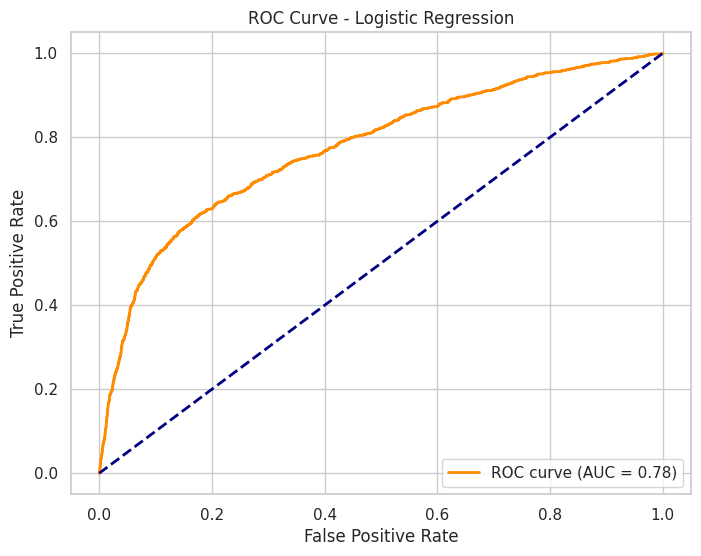

In [ ]:
#Converting to predictions to probabilities
y_pred_proba=lor.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
# Calculating the AUC(Area Under the Curve)
roc_auc=auc(fpr, tpr)

#Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,color='darkorange',lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

* The ROC curve is above the diagonal line, which indicates that the model is performing better than random chance. The AUC of 0.72 means that the model is able to correctly classify 72% of positive cases while only incorrectly classifying 28% of negative cases

#Comparison of the models

##Logistic regression

In [ ]:
report_lor_train=classification_report(y_train,y_pred_lor_train)
print("Classification report for train data:\n",report_lor_train)
report_lor_test = classification_report(y_test,y_pred_lor_test)
print("Classification report for test data:\n",report_lor_test)


Classification report for train data:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     12441
           1       0.55      0.59      0.57      3764

    accuracy                           0.79     16205
   macro avg       0.71      0.72      0.72     16205
weighted avg       0.80      0.79      0.79     16205

Classification report for test data:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      5347
           1       0.55      0.58      0.56      1598

    accuracy                           0.79      6945
   macro avg       0.71      0.72      0.71      6945
weighted avg       0.80      0.79      0.79      6945



##Random Forest

In [ ]:
report_rf_train=classification_report(y_train,y_pred_rf_train)
print("Classification report for train data:\n",report_rf_train)
report_rf_test = classification_report(y_test,y_pred_rf_test)
print("Classification report for test data:\n",report_rf_test)


Classification report for train data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     12441
           1       0.95      0.95      0.95      3764

    accuracy                           0.98     16205
   macro avg       0.97      0.97      0.97     16205
weighted avg       0.98      0.98      0.98     16205

Classification report for test data:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      5347
           1       0.51      0.50      0.50      1598

    accuracy                           0.78      6945
   macro avg       0.68      0.68      0.68      6945
weighted avg       0.77      0.78      0.77      6945



##Adaboosting

In [ ]:
report_ad_train=classification_report(y_train,y_pred_ad_train)
print("Classification report for train data:\n",report_ad_train)
report_ad_test = classification_report(y_test,y_pred_ad_test)
print("Classification report for test data:\n",report_ad_test)


Classification report for train data:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     12441
           1       0.56      0.56      0.56      3764

    accuracy                           0.80     16205
   macro avg       0.72      0.71      0.71     16205
weighted avg       0.80      0.80      0.80     16205

Classification report for test data:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      5347
           1       0.55      0.53      0.54      1598

    accuracy                           0.79      6945
   macro avg       0.71      0.70      0.71      6945
weighted avg       0.79      0.79      0.79      6945



##Adaboosting (Logistic regression)

In [ ]:
report_adl_train=classification_report(y_train,y_pred_adl_train)
print("Classification report for train data:\n",report_adl_train)
report_adl_test = classification_report(y_test,y_pred_adl_test)
print("Classification report for test data:\n",report_adl_test)

Classification report for train data:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     12441
           1       0.55      0.59      0.57      3764

    accuracy                           0.79     16205
   macro avg       0.71      0.72      0.71     16205
weighted avg       0.80      0.79      0.79     16205

Classification report for test data:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      5347
           1       0.54      0.57      0.56      1598

    accuracy                           0.79      6945
   macro avg       0.71      0.71      0.71      6945
weighted avg       0.80      0.79      0.79      6945



Logistic regression outperforms other models in terms of precision and recall for the minority class, demonstrating superior results relative to the alternative models

#Using selected features
In this scenario, we will utilize a subset of seven chosen features from the dataset, selected based on a correlation threshold of 0.1, for training the classification models.

##Train test split

In [ ]:
X1=feature_select.iloc[:,0:7]
y1=feature_select['default payment next month']
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.3)

##Balancing of the data using SMOTE(Synthetic Minority Over-sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
sm1= SMOTE(random_state=42)
x_smote1,y_smote1 =sm1.fit_resample(X_train1,y_train1)
print('Original dataset shape', len(y_train1))
print('Resampled dataset shape', len(y_smote1))

Original dataset shape 16205
Resampled dataset shape 24880


Text(0.5, 1.0, 'Proportion of Default Payment is YES or NO')

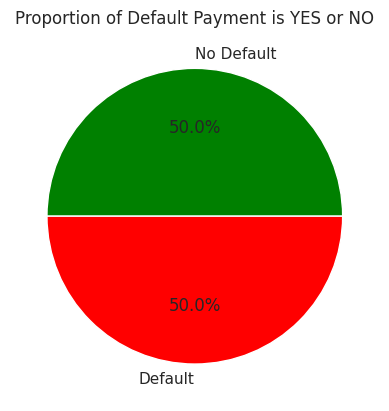

In [ ]:
import matplotlib.pyplot as plt
plt.pie(y_smote1.value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['No Default', 'Default'])
plt.title('Proportion of Default Payment is YES or NO')

##Logistic Regression
Training the data using the best model defined in the previous step.

In [ ]:
lor1=LogisticRegression()
lor1.fit(x_smote1,y_smote1)

LogisticRegression()

In [ ]:
y_pred_lor_train1=lor1.predict(X_train1)
y_pred_lor_test1=lor1.predict(X_test1)

In [ ]:
report_lor_train1=classification_report(y_train1,y_pred_lor_train1)
print("Classification report for train data:\n",report_lor_train1)
report_lor_test1 = classification_report(y_test1,y_pred_lor_test1)
print("Classification report for test data:\n",report_lor_test1)

Classification report for train data:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87     12440
           1       0.56      0.59      0.57      3765

    accuracy                           0.80     16205
   macro avg       0.71      0.72      0.72     16205
weighted avg       0.80      0.80      0.80     16205

Classification report for test data:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      5348
           1       0.53      0.57      0.55      1597

    accuracy                           0.79      6945
   macro avg       0.70      0.71      0.70      6945
weighted avg       0.79      0.79      0.79      6945



In [ ]:
#Roc-AUC score for test data
roc_lor1=roc_auc_score(y_test1,y_pred_lor_test1)

In [ ]:
roc_lor1

0.7089517016994749

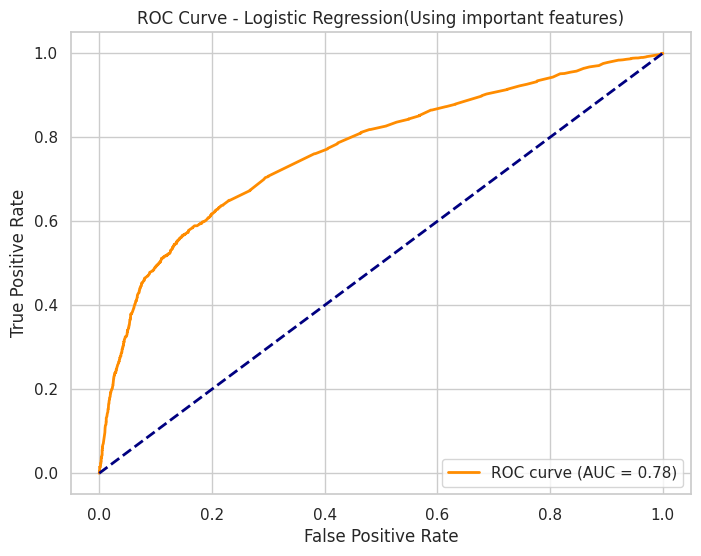

In [ ]:
#Converting to predictions to probabilities
y_pred_proba1=lor1.predict_proba(X_test1)
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_proba1[:,1])
# Calculating the AUC (Area Under the Curve)
roc_auc1=auc(fpr1, tpr1)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1,tpr1,color='darkorange',lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression(Using important features)')
plt.legend(loc='lower right')
plt.show()


#CONCLUSION

* For the given dataset logistic regression gives the best model when compared to the other machine learning models.
* Considering only the important features(7 features instead of 23) also gives comparatively similar results to the model trained using all the features.